# Diabetes

<img src= "https://frenzy86.s3.eu-west-2.amazonaws.com/python/Diabetics.png" width=1000>


Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- Outcome: Class variable (0 or 1)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/diabetes_1.csv

--2025-03-23 23:39:18--  https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/diabetes_1.csv
Risoluzione di frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)... 52.95.191.42, 3.5.244.200, 3.5.245.108, ...
Connessione a frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)|52.95.191.42|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 200 OK
Lunghezza: 23873 (23K) [text/csv]
Salvataggio in: «diabetes_1.csv.1»

diabetes_1.csv.1    100%[===================>]  23,31K  --.-KB/s    in 0,006s  

2025-03-23 23:39:18 (3,77 MB/s) - «diabetes_1.csv.1» salvato [23873/23873]



In [3]:
ls

01Overfitting.pptx   10.1NAN_NULL.ipynb              confusion_matrix.PNG
02_Conf_matrix.pptx  10.2Categorical_variable.ipynb  diabetes_1.csv
03_AUC_ROC.pptx      10.4DiabeticCM-ROC.ipynb        diabetes_1.csv.1
10.0Iris.ipynb       10.5IrisConf.ipynb              logistic_reg_iris.pkl


In [4]:
df = pd.read_csv('diabetes_1.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [8]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
df.groupby('Outcome').count()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


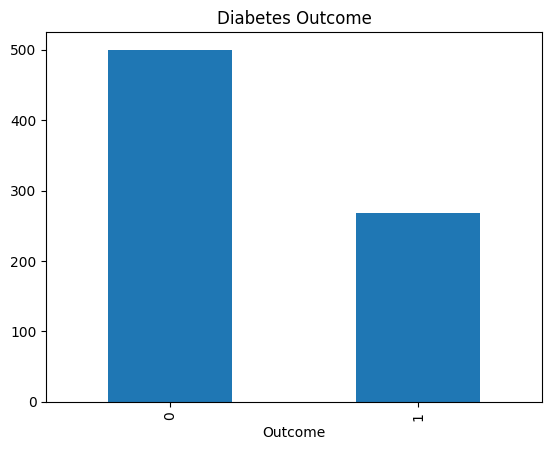

In [11]:
df['Outcome'].value_counts().plot(kind='bar').set_title('Diabetes Outcome');

<Axes: xlabel='Outcome', ylabel='count'>

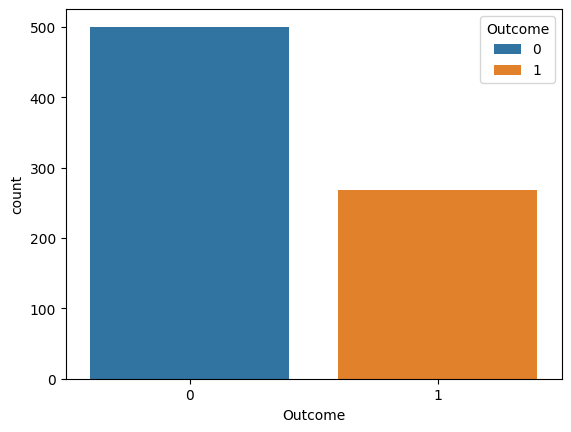

In [12]:
sns.countplot(data=df, x='Outcome',hue='Outcome')

In [13]:
df['Outcome'].value_counts(normalize=True)

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

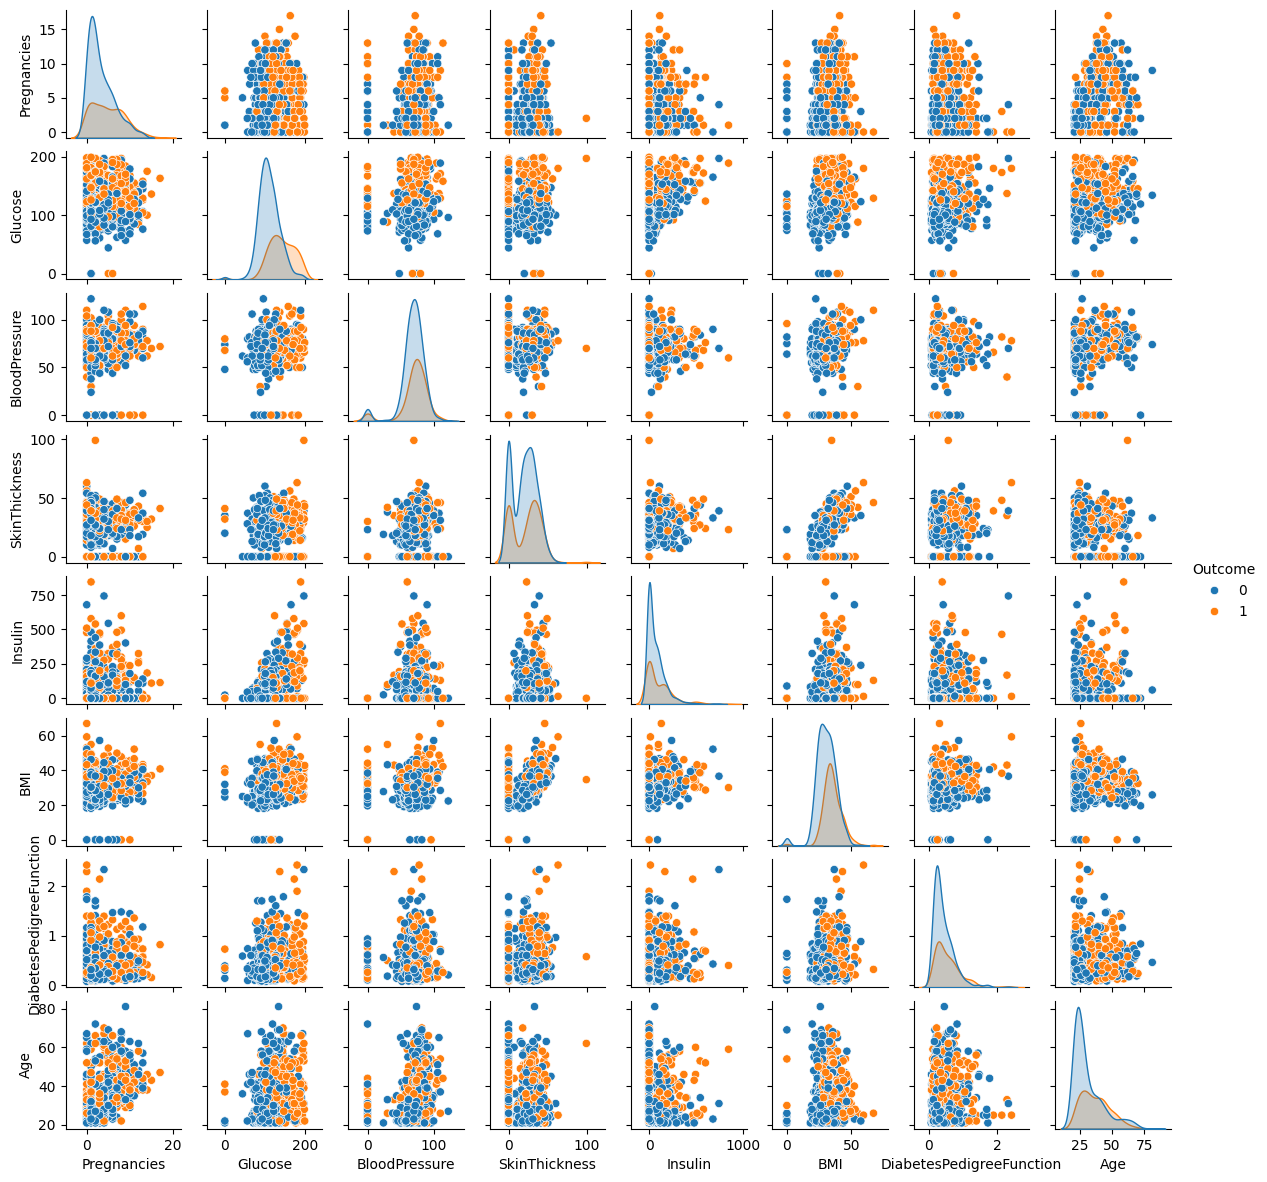

In [14]:
sns.pairplot(df, hue='Outcome',height=1.5)

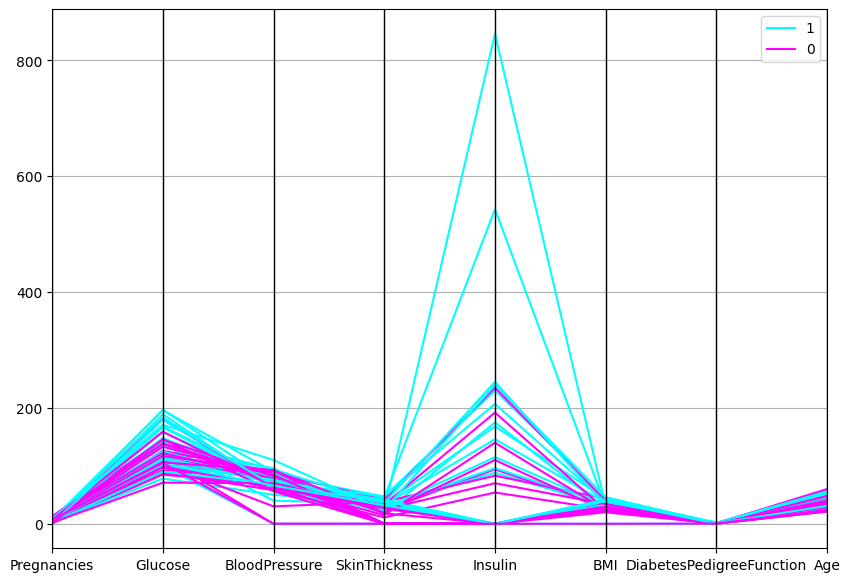

In [15]:
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(10,7));
parallel_coordinates(df[0:50], class_column="Outcome",colormap='cool');

In [16]:
corr = df.corr(numeric_only=True)

<Axes: >

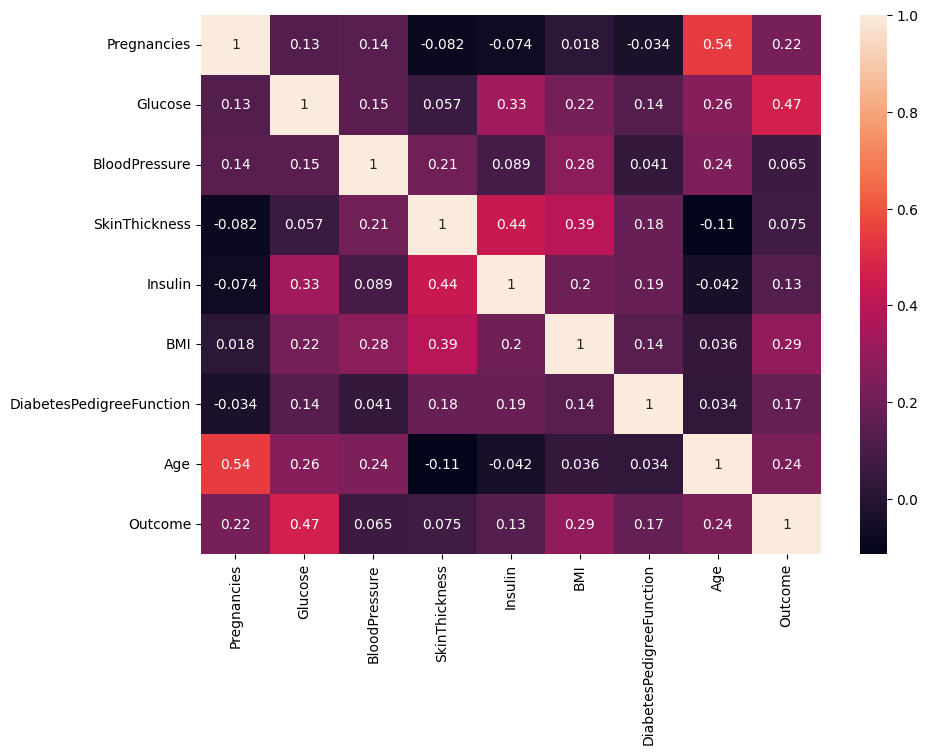

In [17]:
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True)  # annot display corr label

In [18]:
#STEP1
X = df.drop('Outcome', axis=1) #vettore features  # axis=0 for row, axis=1 for column
y = df['Outcome']  #Target

In [19]:
# split data to 80:20 ratio for train/test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=.2,
                                                    random_state=667,
                                                    stratify=y
                                                    )

In [20]:
from sklearn.linear_model import LogisticRegression

model_lr= LogisticRegression()
model_lr.fit(X_train,y_train)

LogisticRegression()

In [21]:
from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier(n_estimators=100, max_depth=5)
model_rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=5)

In [22]:
y_pred = model_rfc.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0])

In [23]:
model_rfc.score(X_train,y_train)

0.8583061889250815

In [24]:
model_rfc.score(X_test,y_test)

0.7467532467532467

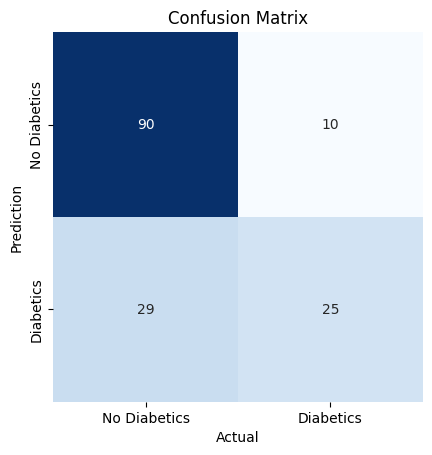

In [25]:
from sklearn.metrics import confusion_matrix

#labels = y_test.sort_values().drop_duplicates().to_list()
labels = ['No Diabetics','Diabetics']

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm , square=True, annot=True, cbar=False,cmap='Blues',xticklabels=labels,yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Prediction');

In [26]:
from sklearn.metrics import confusion_matrix
# see how model confusion matrix varies with threshold
bestmodel = model_lr

#labels = y_test.sort_values().drop_duplicates().to_list()
labels = ['No Diabetics','Diabetics']

def make_confusion_matrix(model, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (bestmodel.predict(X_test) is done automatically with a threshold of 0.5)
    y_pred = (bestmodel.predict_proba(X_test)[:, 1] >= threshold)
    conf = confusion_matrix(y_test, y_pred)
    plt.figure(figsize = [6,6])
    sns.heatmap(conf, cmap='Blues', annot=True, square=True, cbar=False,
           xticklabels=labels,
           yticklabels=labels);
    plt.xlabel('Actual')
    plt.ylabel('Prediction')
    plt.show() # This is part that needs to be added to fix the issue

# Let's see how our confusion matrix changes with changes to the cutoff!
from ipywidgets import interactive, FloatSlider
interactive(lambda threshold: make_confusion_matrix(bestmodel, threshold), threshold=(0.0,1.0,0.01))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.90      0.82       100
           1       0.71      0.46      0.56        54

    accuracy                           0.75       154
   macro avg       0.74      0.68      0.69       154
weighted avg       0.74      0.75      0.73       154



## Roc CURVE (Binary Classification Problems)

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/IFAO/roc_curve.png" width="800">

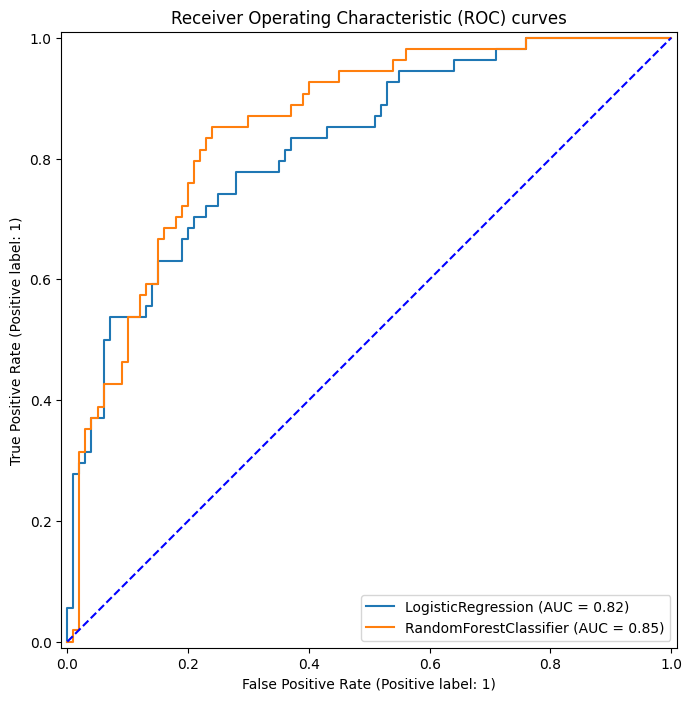

In [28]:
from sklearn.metrics import RocCurveDisplay

plt.figure(figsize=(8,8))
ax = plt.gca()

RocCurveDisplay.from_estimator(model_lr, X_test, y_test,ax=ax)
RocCurveDisplay.from_estimator(model_rfc, X_test, y_test,ax=ax)
plt.plot([0,1],[0,1],'--b')

plt.title("Receiver Operating Characteristic (ROC) curves")
plt.legend(loc=4);